# 1. Découverte des données

## 1.1 Installation des Packages

In [41]:
pip install requests 

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install lxml 

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install selenium 

  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.11
    Uninstalling urllib3-1.25.11:
      Successfully uninstalled urllib3-1.25.11
Note: you may need to restart the kernel to use updated packages.


ERROR: requests 2.24.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.7 which is incompatible.


* requests est un package servant à récupérer les données d'un site web
* lxml est un package servant à télécharger des fichiers lxml
* selenium est un package servant à l'interaction automatisée avec un serveur

## 1.2 Importation des Librairies

In [44]:
import lxml
import selenium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
sns.set(rc={'figure.figsize':(20,10)})
sns.set_theme()


AttributeError: module 'seaborn' has no attribute 'set_theme'

## 1.3 Création d'une première base "Races"

* Récupération des données à partir d'une API en ligne : "ergast.com"
* Objectif : création d'une base "Races" regroupant les années des saisons, le nom et le rang du circuit dans la saison, la latitude et la longitude du circuit (utile plus tard pour les représentations géographiques), le pays et la date du circuit, ainsi que l'url wikipédia associé
* La base contient 550 lignes correspondant aux saisons comprises entre 1990 et 2020

In [45]:
races = {'season': [],
        'round': [],
        'circuit_id': [],
        'lat': [],
        'long': [],
        'country': [],
        'date': [],
        'url': []}

for year in list(range(1990,2021)):
    
    url = 'https://ergast.com/api/f1/{}.json'
    r = requests.get(url.format(year))
    json = r.json()

    for item in json['MRData']['RaceTable']['Races']:
        try:
            races['season'].append(int(item['season']))
        except:
            races['season'].append(None)

        try:
            races['round'].append(int(item['round']))
        except:
            races['round'].append(None)

        try:
            races['circuit_id'].append(item['Circuit']['circuitId'])
        except:
            races['circuit_id'].append(None)

        try:
            races['lat'].append(float(item['Circuit']['Location']['lat']))
        except:
            races['lat'].append(None)

        try:
            races['long'].append(float(item['Circuit']['Location']['long']))
        except:
            races['long'].append(None)

        try:
            races['country'].append(item['Circuit']['Location']['country'])
        except:
            races['country'].append(None)

        try:
            races['date'].append(item['date'])
        except:
            races['date'].append(None)

        try:
            races['url'].append(item['url'])
        except:
            races['url'].append(None)
        
race= pd.DataFrame(races)

In [46]:
race

,season,round,circuit_id,lat,long,country,date,url
0,1990,1,phoenix,33.4479,-112.07500,USA,1990-03-11,http://en.wikipedia.org/wiki/1990_United_State...
1,1990,2,interlagos,-23.7036,-46.69970,Brazil,1990-03-25,http://en.wikipedia.org/wiki/1990_Brazilian_Gr...
2,1990,3,imola,44.3439,11.71670,Italy,1990-05-13,http://en.wikipedia.org/wiki/1990_San_Marino_G...
3,1990,4,monaco,43.7347,7.42056,Monaco,1990-05-27,http://en.wikipedia.org/wiki/1990_Monaco_Grand...
4,1990,5,villeneuve,45.5000,-73.52280,Canada,1990-06-10,http://en.wikipedia.org/wiki/1990_Canadian_Gra...
...,...,...,...,...,...,...,...,...
546,2020,13,imola,44.3439,11.71670,Italy,2020-11-01,https://en.wikipedia.org/wiki/2020_Emilia_Roma...
547,2020,14,istanbul,40.9517,29.40500,Turkey,2020-11-15,https://en.wikipedia.org/wiki/2020_Turkish_Gra...
548,2020,15,bahrain,26.0325,50.51060,Bahrain,2020-11-29,https://en.wikipedia.org/wiki/2020_Bahrain_Gra...
549,2020,16,bahrain,26.0325,50.51060,Bahrain,2020-12-06,https://en.wikipedia.org/wiki/2020_Sakhir_Gran...


In [47]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      551 non-null    int64  
 1   round       551 non-null    int64  
 2   circuit_id  551 non-null    object 
 3   lat         551 non-null    float64
 4   long        551 non-null    float64
 5   country     551 non-null    object 
 6   date        551 non-null    object 
 7   url         551 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 34.6+ KB


## 1.4 Création d'une deuxième base "Results"

* Objectif : création d'une deuxième base incluant notamment la position sur la grille de départ et le podium final
* Observations de valeurs manquantes sur la variable "time" : on choisit donc de l'exclure (64% de valeurs manquantes)

In [48]:
rounds = []
for year in np.array(race.season.unique()):
    rounds.append([year, list(race[race.season == year]['round'])])

# query API
    
results = {'season': [],
          'round':[],
           'circuit_id':[],
          'driver': [],
           'date_of_birth': [],
           'nationality': [],
          'constructor': [],
          'grid': [],
          'time': [],
          'status': [],
          'points': [],
          'podium': []}

for n in list(range(len(rounds))):
    for i in rounds[n][1]:
    
        url = 'http://ergast.com/api/f1/{}/{}/results.json'
        r = requests.get(url.format(rounds[n][0], i))
        json = r.json()

        for item in json['MRData']['RaceTable']['Races'][0]['Results']:
            try:
                results['season'].append(int(json['MRData']['RaceTable']['Races'][0]['season']))
            except:
                results['season'].append(None)

            try:
                results['round'].append(int(json['MRData']['RaceTable']['Races'][0]['round']))
            except:
                results['round'].append(None)

            try:
                results['circuit_id'].append(json['MRData']['RaceTable']['Races'][0]['Circuit']['circuitId'])
            except:
                results['circuit_id'].append(None)

            try:
                results['driver'].append(item['Driver']['driverId'])
            except:
                results['driver'].append(None)
            
            try:
                results['date_of_birth'].append(item['Driver']['dateOfBirth'])
            except:
                results['date_of_birth'].append(None)
                
            try:
                results['nationality'].append(item['Driver']['nationality'])
            except:
                results['nationality'].append(None)

            try:
                results['constructor'].append(item['Constructor']['constructorId'])
            except:
                results['constructor'].append(None)

            try:
                results['grid'].append(int(item['grid']))
            except:
                results['grid'].append(None)

            try:
                results['time'].append(int(item['Time']['millis']))
            except:
                results['time'].append(None)

            try:
                results['status'].append(item['status'])
            except:
                results['status'].append(None)

            try:
                results['points'].append(int(item['points']))
            except:
                results['points'].append(None)

            try:
                results['podium'].append(int(item['position']))
            except:
                results['podium'].append(None)

           
results = pd.DataFrame(results)

In [49]:
results

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium
0,1990,1,phoenix,senna,1960-03-21,Brazilian,mclaren,5,6752829.0,Finished,9.0,1
1,1990,1,phoenix,alesi,1964-06-11,French,tyrrell,4,6761514.0,Finished,6.0,2
2,1990,1,phoenix,boutsen,1957-07-13,Belgian,williams,9,6806909.0,Finished,4.0,3
3,1990,1,phoenix,piquet,1952-08-17,Brazilian,benetton,6,6821187.0,Finished,3.0,4
4,1990,1,phoenix,modena,1963-05-12,Italian,brabham,10,6822332.0,Finished,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12392,2020,17,yas_marina,giovinazzi,1993-12-14,Italian,alfa,14,NaN,+1 Lap,0.0,16
12393,2020,17,yas_marina,latifi,1995-06-29,Canadian,williams,18,NaN,+1 Lap,0.0,17
12394,2020,17,yas_marina,kevin_magnussen,1992-10-05,Danish,haas,20,NaN,+1 Lap,0.0,18
12395,2020,17,yas_marina,pietro_fittipaldi,1996-06-25,Brazilian,haas,17,NaN,+2 Laps,0.0,19


In [50]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         12397 non-null  int64  
 1   round          12397 non-null  int64  
 2   circuit_id     12397 non-null  object 
 3   driver         12397 non-null  object 
 4   date_of_birth  12397 non-null  object 
 5   nationality    12397 non-null  object 
 6   constructor    12397 non-null  object 
 7   grid           12397 non-null  int64  
 8   time           4464 non-null   float64
 9   status         12397 non-null  object 
 10  points         12392 non-null  float64
 11  podium         12397 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


0.639912882148907

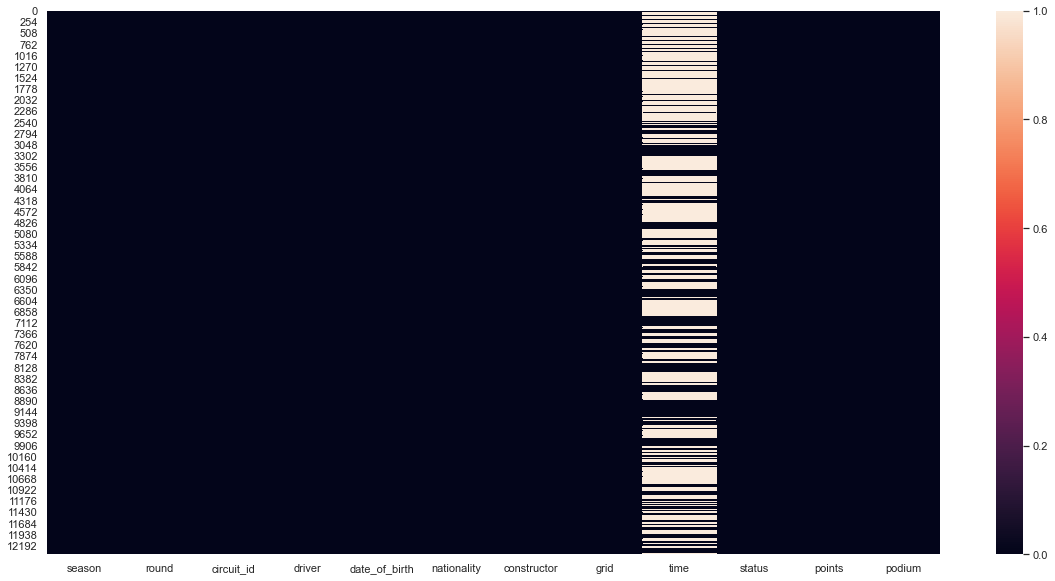

In [51]:
results_na=results.copy()
sns.heatmap(results_na.isna()) # On visualise l'emplacements des valeurs manquantes On a bcp de valeurs manquantes et un peu partout
results_na.isna()['time'].mean() # 64% de valeurs manquantes on ne va donc pas utilise